In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("headbrain.csv")
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [4]:
data.shape

(237, 4)

In [5]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

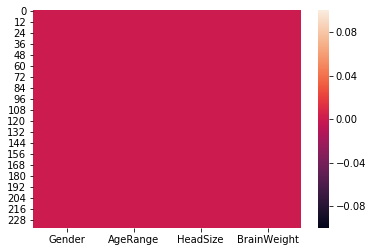

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


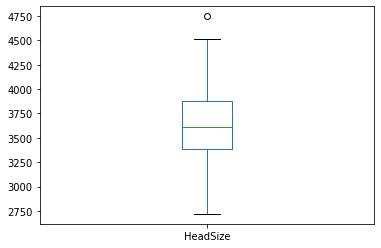

In [9]:
data["HeadSize"].plot.box()

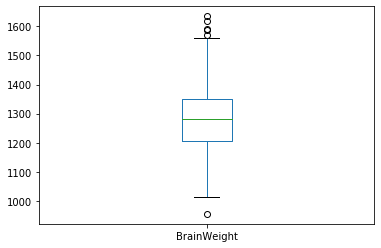

In [10]:
data["BrainWeight"].plot.box()

Gender            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AgeRange       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
HeadSize       AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
BrainWeight    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

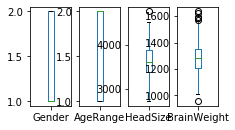

In [11]:
data.plot(kind="box",subplots=True,layout=(2,7))

In [12]:
#from scipy.stats import zscore
#z=np.abs(zscore(data))
#z

In [13]:
#threshold=3
#print(np.where(z>3))

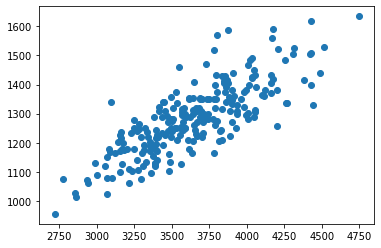

In [14]:
plt.scatter(data["HeadSize"],data['BrainWeight'])

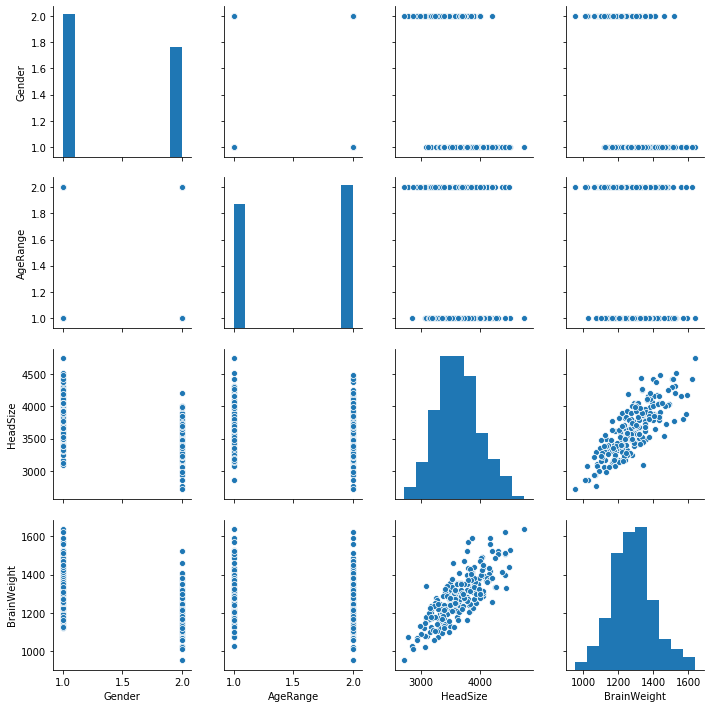

In [15]:
sns.pairplot(data)

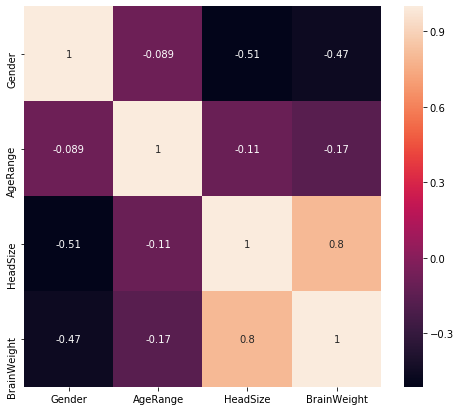

In [16]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [17]:
#data_new=data[(z<3).all(axis=1)]

In [18]:
data.shape

(237, 4)

In [19]:
#data_new.shape

In [20]:
#data=data_new
data.shape

(237, 4)

In [21]:
x=data["HeadSize"].values
y=data.iloc[:,-1].values

In [22]:
x.shape

(237,)

In [23]:
x=x.reshape(-1,1)
x.shape

(237, 1)

In [24]:
y.shape

(237,)

In [25]:
y=y.reshape(-1,1)
y.shape

(237, 1)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [67]:
x_train.shape

(187, 1)

In [68]:
y_train.shape

(187, 1)

In [69]:
x_test.shape

(50, 1)

In [70]:
y_test.shape

(50, 1)

In [71]:
lm=LinearRegression()

In [72]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm.coef_

array([[0.26324219]])

In [74]:
lm.intercept_

array([323.27019562])

In [75]:
lm.score(x_train,y_train)

0.615279238450257

In [76]:
#predicting the value
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [[1244.35463246]
 [1343.59693961]
 [1265.67725018]
 [1215.92447551]
 [1319.64189995]
 [1151.16689578]
 [1371.50061217]
 [1077.19583927]
 [1263.30807043]
 [1213.29205357]
 [1377.55518263]
 [1192.49592024]
 [1320.16838434]
 [1293.84416494]
 [1269.36264089]
 [1233.56170251]
 [1572.88089059]
 [1295.16037591]
 [1194.3386156 ]
 [1487.85366192]
 [1218.82013964]
 [1218.03041306]
 [1252.51514048]
 [1174.33220886]
 [1229.6130696 ]
 [1183.54568565]
 [1263.30807043]
 [1489.43311509]
 [1216.71420209]
 [1487.59041973]
 [1389.66432356]
 [1281.99826621]
 [1205.65802994]
 [1138.00478608]
 [1489.43311509]
 [1340.96451766]
 [1231.71900715]
 [1130.63400465]
 [1213.81853796]
 [1391.24377672]
 [1178.54408396]
 [1385.18920626]
 [1243.82814807]
 [1349.65151007]
 [1279.36584427]
 [1207.23748311]
 [1200.91967045]
 [1145.63880971]
 [1160.64361477]
 [1173.01599789]]
actual price [[1275]
 [1405]
 [1320]
 [1125]
 [1400]
 [1202]
 [1375]
 [1012]
 [1295]
 [1185]
 [1280]
 [1165]
 [1318]
 [1355]


In [77]:
print("error:")
print(mean_squared_error(y_test,pred))

error:
4573.946623849592


In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7148347544847222
